**Md. Yasin Aziz | 17201019 | CSE422 | Decision Tree Lab 7 | Fall 2020 | BRACU | Sec: 2**

**Tasks**

Using Scikit Learn Library

In [1]:
import pandas as pd
import numpy as np
from pprint import pprint

#import the dataset
dataset = pd.read_csv("/content/heart failur classification dataset.csv")

# handling missing values
from sklearn.impute import SimpleImputer
impute = SimpleImputer(missing_values=np.nan, strategy='mean')
impute.fit(dataset[['serum_sodium']])
dataset['serum_sodium'] = impute.transform(dataset[['serum_sodium']])
impute.fit(dataset[['time']])
dataset['time'] = impute.transform(dataset[['time']])

#String to Integer

dataset['sex'] = (dataset['sex'] == "Female").astype(int)
dataset['smoking'] = (dataset['smoking'] == "Yes").astype(int)

from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
X = dataset.iloc[:,1:13] #data.iloc[:, 0:2] # first two columns of data frame with all rows. Source : git
y = dataset.iloc[:,13] #If you are a beginner with Python, remember that df.iloc[:, 10] would refer to the eleventh column.
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=1)
clf = DecisionTreeClassifier(criterion='entropy',random_state=1)
clf.fit(X_train,y_train)
y_pred = clf.predict(X_test)
score=accuracy_score(y_pred,y_test)
score = score * 100
print(score)
dataset

85.0


,Unnamed: 0,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,DEATH_EVENT
0,0,75.0,0,582,0,20,1,265000.00,1.9,136.675768,0,0,4.000000,1
1,1,55.0,0,7861,0,38,0,263358.03,1.1,136.000000,0,0,6.000000,1
2,2,65.0,0,146,0,20,0,162000.00,1.3,129.000000,0,1,7.000000,1
3,3,50.0,1,111,0,20,0,210000.00,1.9,137.000000,0,0,7.000000,1
4,4,65.0,1,160,1,20,0,327000.00,2.7,116.000000,1,0,8.000000,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
294,294,62.0,0,61,1,38,1,155000.00,1.1,143.000000,0,1,270.000000,0
295,295,55.0,0,1820,0,38,0,270000.00,1.2,136.675768,1,0,271.000000,0
296,296,45.0,0,2060,1,60,0,742000.00,0.8,138.000000,1,0,278.000000,0
297,297,45.0,0,2413,0,38,0,140000.00,1.4,140.000000,0,1,280.000000,0


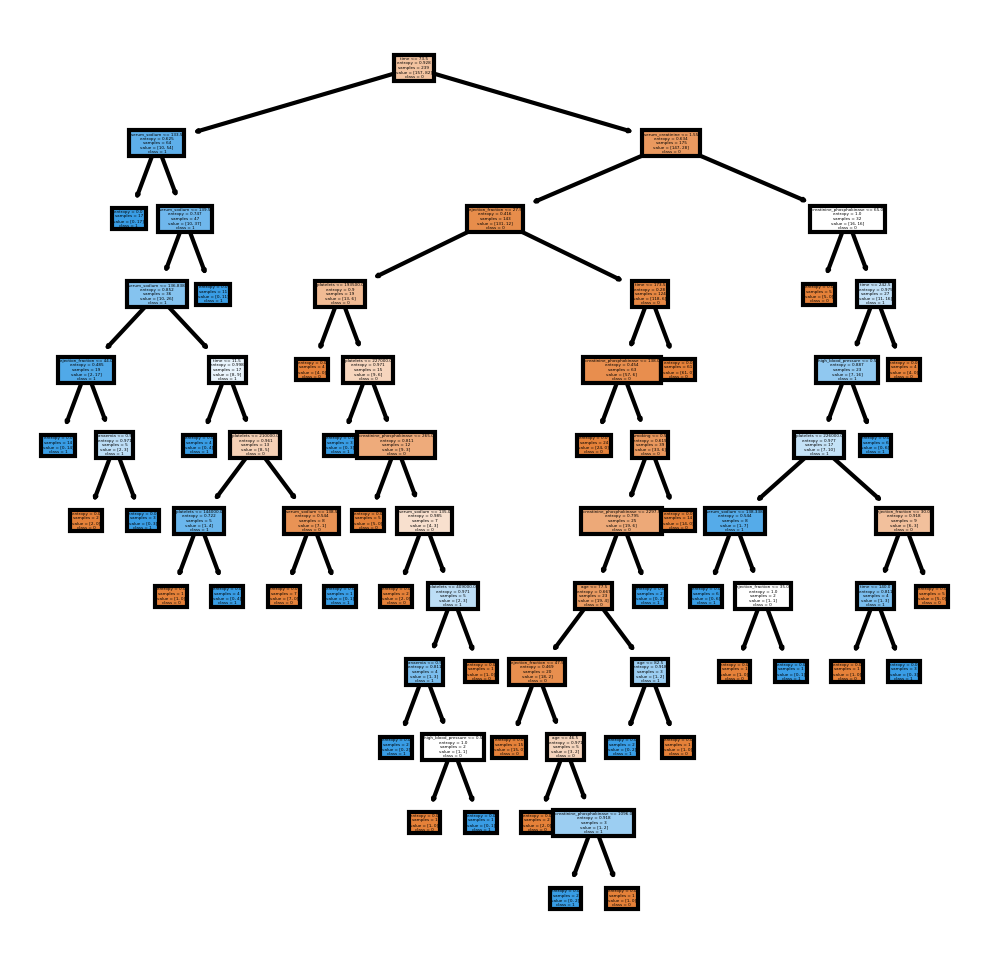

In [2]:
from sklearn import tree
import matplotlib.pyplot as plt
fig, axes = plt.subplots(nrows = 1,ncols = 1,figsize = (4,4), dpi=300)
tree.plot_tree(clf,
               feature_names = X.columns, 
               class_names=['0', '1'],
               filled = True);

In [3]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report
from sklearn.model_selection import train_test_split

dataset = pd.read_csv('heart failur classification dataset.csv')
#First Index Count Column is unnecessary
dataset = dataset.drop('Unnamed: 0',axis=1)

# handling missing values
from sklearn.impute import SimpleImputer
impute = SimpleImputer(missing_values=np.nan, strategy='mean')
impute.fit(dataset[['serum_sodium']])
dataset['serum_sodium'] = impute.transform(dataset[['serum_sodium']])
impute.fit(dataset[['time']])
dataset['time'] = impute.transform(dataset[['time']])

#String to Integer
dataset['sex'] = (dataset['sex'] == "Female").astype(int)
dataset['smoking'] = (dataset['smoking'] == "Yes").astype(int)


# encoding categorical variable - binary
from sklearn.preprocessing import LabelEncoder
enc = LabelEncoder()

dataset['sex'] = enc.fit_transform(dataset['sex'])

dataset['smoking'] = enc.fit_transform(dataset['smoking'])

# splitting the dataset
from sklearn.model_selection import train_test_split
x = dataset.loc[:, 'age':'time']
y = dataset.loc[:, 'DEATH_EVENT']
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2, random_state=42)

# feature scaling using MinMax Scalar
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
scaler.fit(x_train)

x_train_scaled = scaler.transform(x_train)

x_test_scaled = scaler.transform(x_test)

# final accuracy checking
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier()

knn.fit(x_train_scaled, y_train)

regAcc2 = format(knn.score(x_test_scaled, y_test))
regAcc = float (regAcc2) * 100
print (regAcc)
#print("Accuracy: {:.2f}".format(knn.score(x_test_scaled, y_test)))



60.0


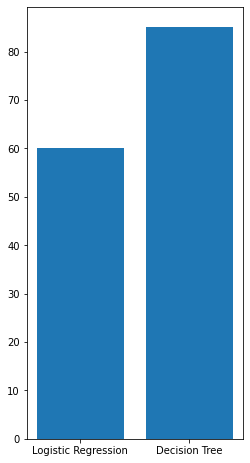

In [4]:
fig = plt.figure()
ax = fig.add_axes([0,0,.5,1.5])
method = ['Logistic Regression', 'Decision Tree']
percentage = [regAcc, score]
ax.bar(method,percentage)
plt.show()

# **References:**

---



1.   https://www.youtube.com/watch?v=UdTKxGQvYdc
2.   https://www.youtube.com/watch?v=9r7FIXEAGvs
3.   https://towardsdatascience.com/decision-trees-for-classification-id3-algorithm-explained-89df76e72df1


